# Support Vector Machines

### Simple Example using scikit-learn in Python

In [1]:
import pandas as pd
telecom = pd.read_csv("F:/Python Material/ML with Python/Datasets/Telecom.csv")
telecom.head()

,Gender,TT_gt_100,Response
0,F,Y,N
1,M,N,N
2,M,N,N
3,F,Y,Y
4,F,N,N


Creating Dummy variables as the categorical varaibles cannot be used directly with SVM

In [2]:
dum_telecom = pd.get_dummies(telecom, drop_first=True)
dum_telecom.head()

,Gender_M,TT_gt_100_Y,Response_Y
0,0,1,0
1,1,0,0
2,1,0,0
3,0,1,1
4,0,0,0


Separating the features from response for making the data compatible with scikit-learn functions

In [3]:
X = dum_telecom.iloc[:,0:2]
y = dum_telecom.iloc[:,2]

Necessary imports for Supervised type Machine Learning

In [4]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.svm import SVC

Create training and test sets

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, 
                                                    random_state=42,
                                                    stratify=y)

Fitting the model on train set and predicting on the test set

In [6]:
svc = SVC(probability = True)
fitSVC = svc.fit(X_train, y_train)
y_pred = fitSVC.predict(X_test)

The above function call contains the option probability = True in order to calculate the probabilities for predictions

Confusion Matrix:

In [7]:
print(confusion_matrix(y_test, y_pred))

[[21  1]
 [ 2 21]]


Classification Report:

In [8]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.91      0.95      0.93        22
          1       0.95      0.91      0.93        23

avg / total       0.93      0.93      0.93        45



Accuracy Score:

In [9]:
print("Accuracy Score = %.4f" % accuracy_score(y_test, y_pred))

Accuracy Score = 0.9333


ROC Curve:

In [10]:
from sklearn.metrics import roc_curve, roc_auc_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = svc.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

Plotting the ROC curve:

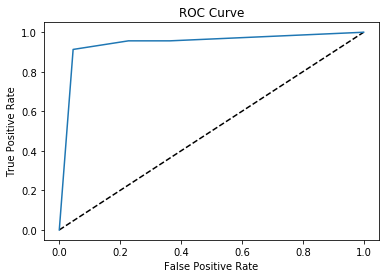

In [13]:
import matplotlib.pyplot as plt
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [12]:
print("Area Under the Curve = %.4f" % roc_auc_score(y_test, y_pred_prob))

Area Under the Curve = 0.9437
